In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
Sparkling_df = pd.read_csv("/content/drive/MyDrive/Time Series Forecasting/Sparkling.csv", parse_dates = ['YearMonth'],index_col = 'YearMonth')

In [181]:
Sparkling_df.dtypes

Sparkling    int64
dtype: object

In [182]:
Sparkling_df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [183]:
Sparkling_df.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [184]:
Sparkling_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [185]:
Sparkling_df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

##EDA

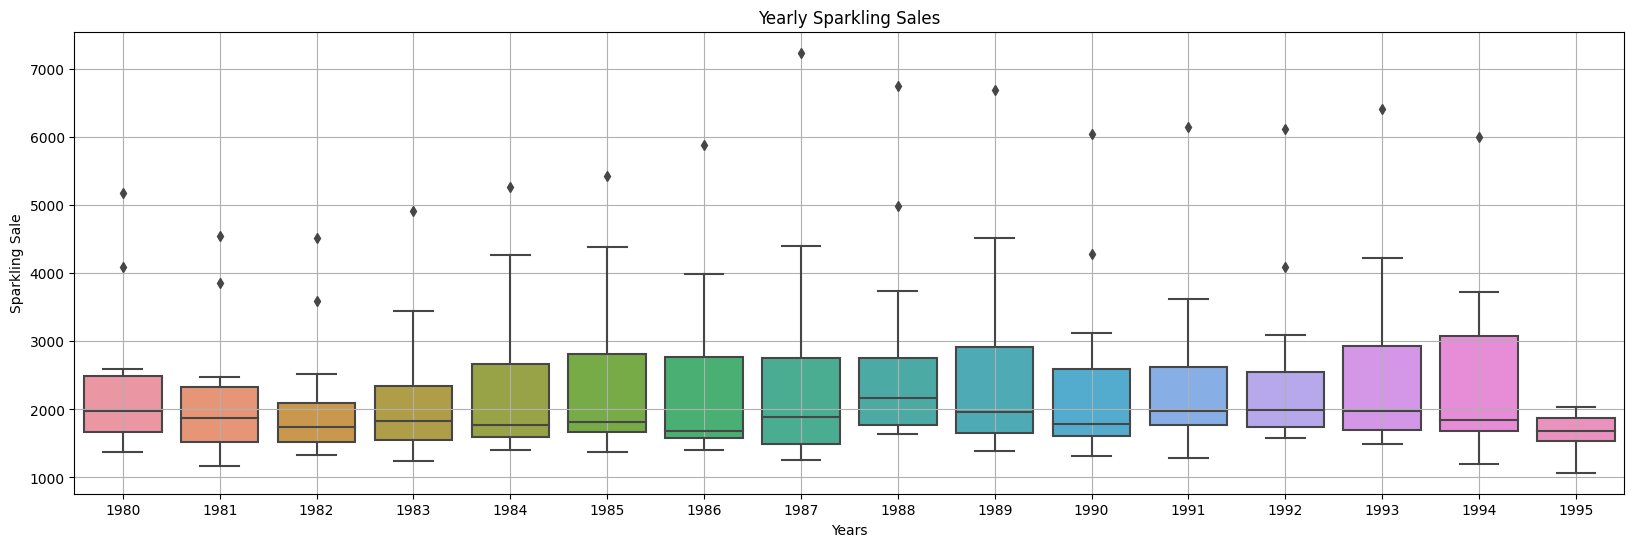

In [186]:
fig,ax=plt.subplots(figsize=(20,6))
sns.boxplot(x=Sparkling_df.index.year,y=Sparkling_df.Sparkling,ax=ax,whis=1.5)
plt.grid();
plt.xlabel("Years")
plt.ylabel("Sparkling Sale")
plt.title("Yearly Sparkling Sales");

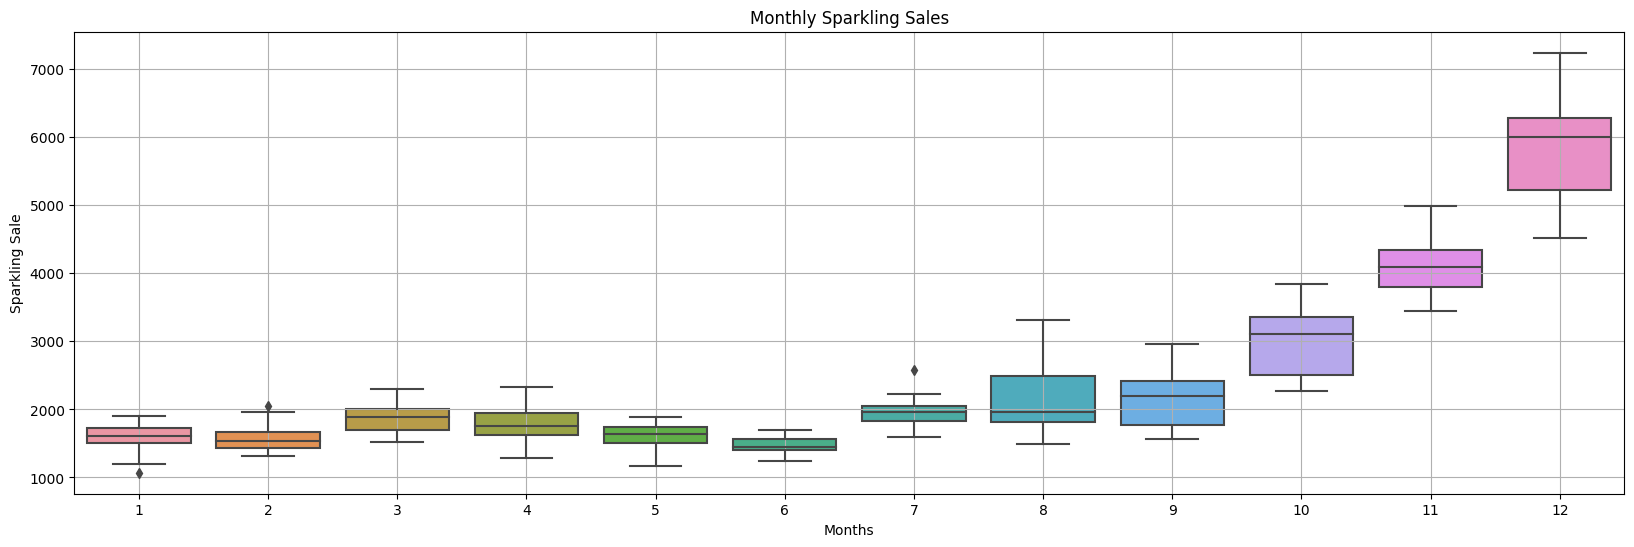

In [187]:
fig,ax=plt.subplots(figsize=(20,6))
sns.boxplot(x=Sparkling_df.index.month,y=Sparkling_df.Sparkling,ax=ax,whis=1.5)
plt.grid();
plt.xlabel("Months")
plt.ylabel("Sparkling Sale")
plt.title("Monthly Sparkling Sales");

In [188]:
from statsmodels.graphics.tsaplots import month_plot

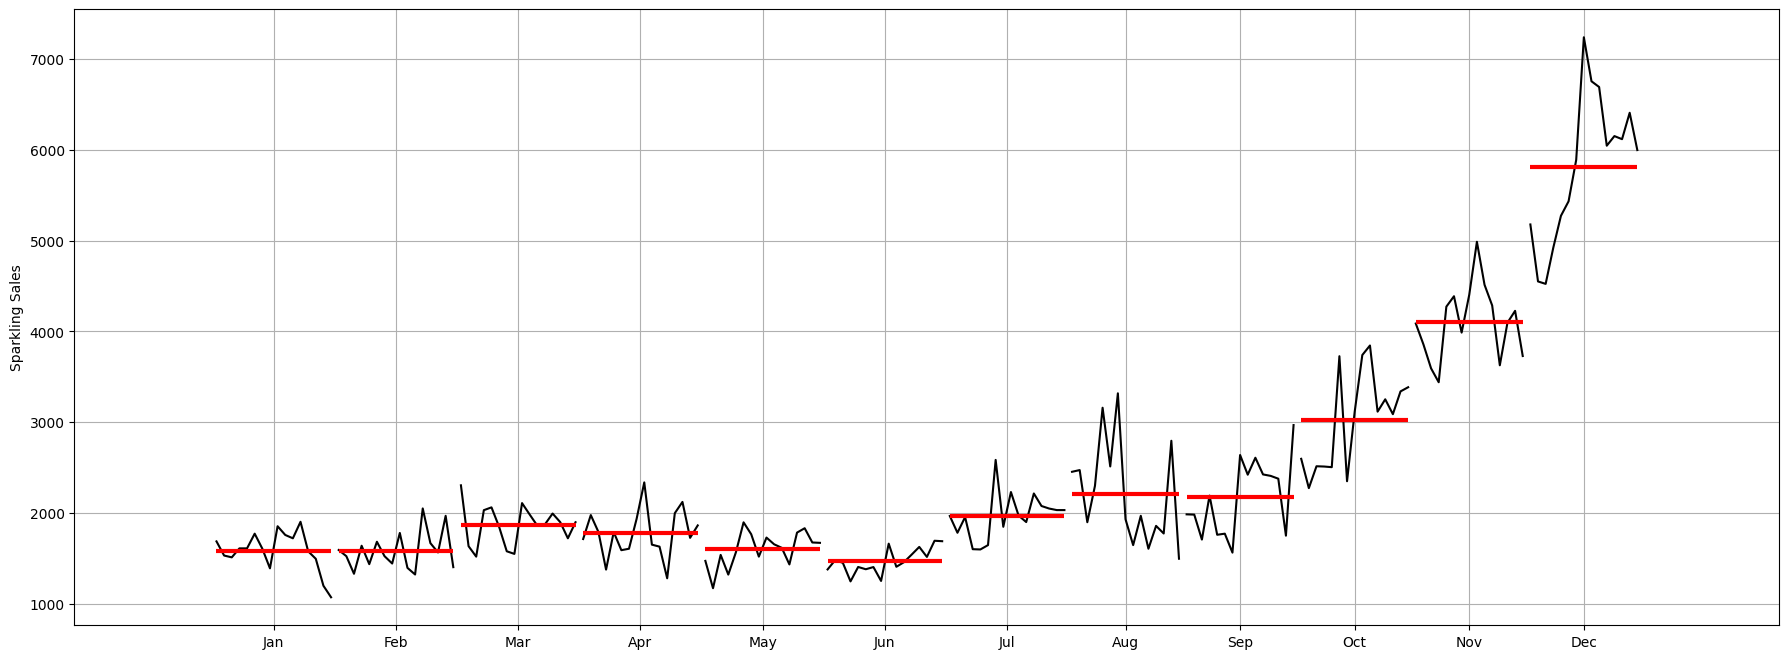

In [189]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(Sparkling_df,ylabel='Sparkling Sales',ax=ax)
plt.grid();

In [190]:
monthly_sales_across_years = pd.pivot_table(Sparkling_df, values = 'Sparkling', columns = Sparkling_df.index.month,
                                        index = Sparkling_df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

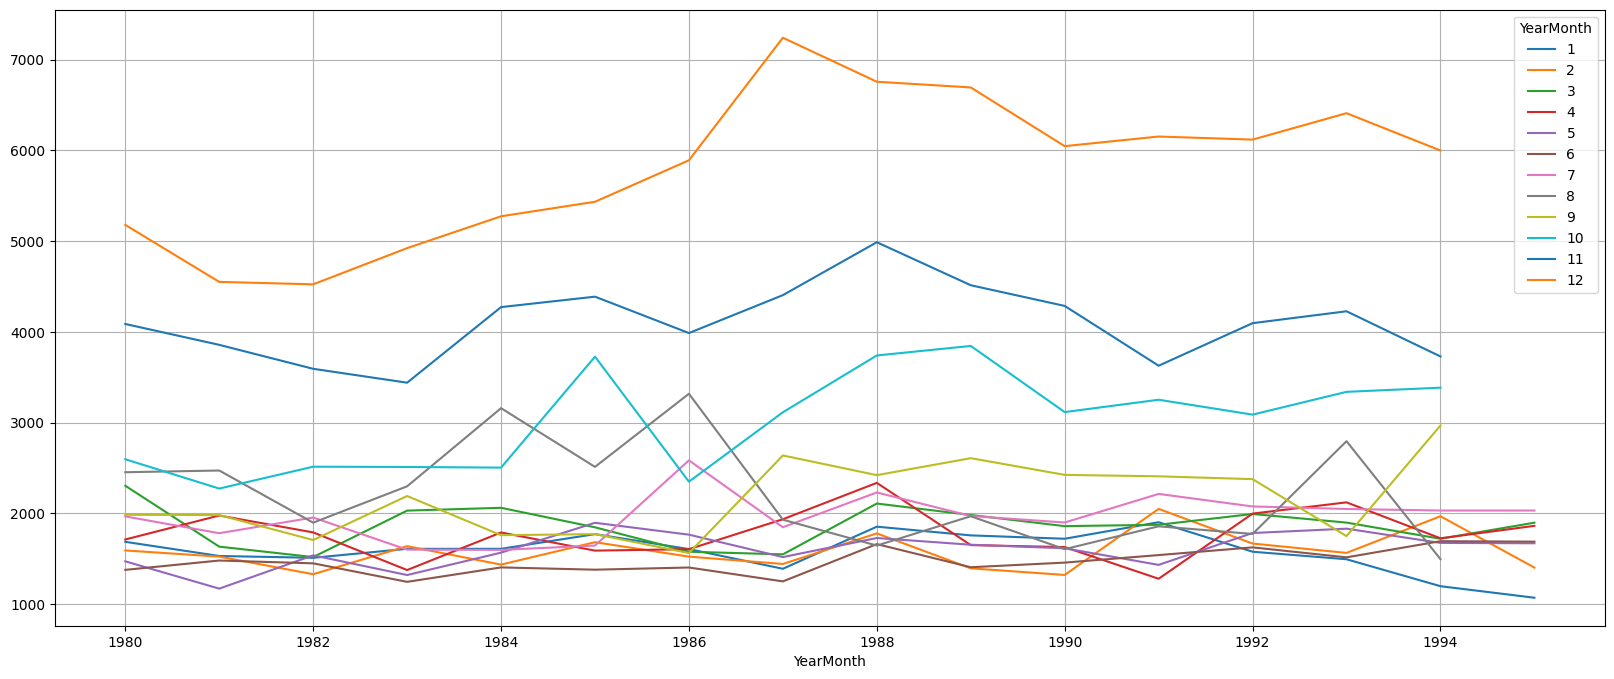

In [191]:
fig, ax = plt.subplots(figsize=(20,8))
monthly_sales_across_years.plot(ax=ax)
plt.grid();

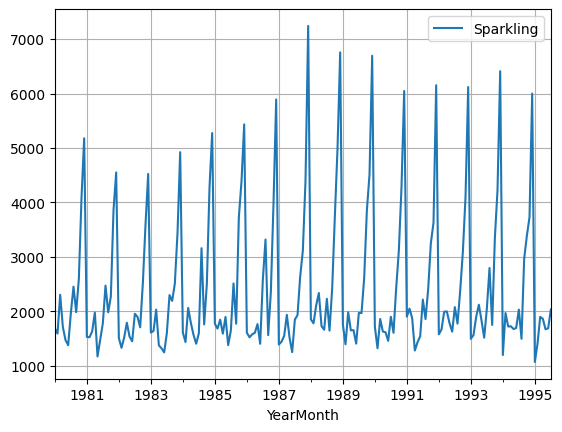

In [192]:
Sparkling_df.plot()
plt.grid();

In [193]:
Sparkling_df_yearly_sum = Sparkling_df.resample('A').sum()
Sparkling_df_yearly_sum.head()

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

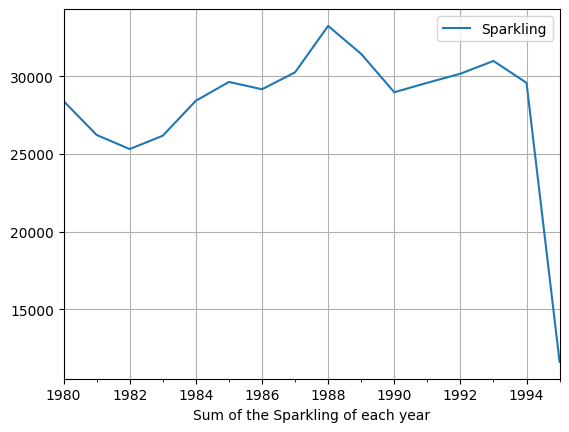

In [194]:
Sparkling_df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Sparkling of each year');

In [195]:
Sparkling_df_yearly_mean = Sparkling_df.resample('Y').mean().round(2)
Sparkling_df_yearly_mean.head()

Sparkling
YearMonth            
1980-12-31    2367.17
1981-12-31    2185.58
1982-12-31    2110.08
1983-12-31    2181.67
1984-12-31    2369.25

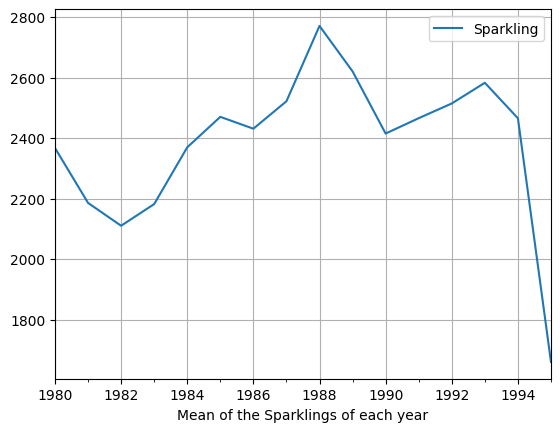

In [196]:
Sparkling_df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Sparklings of each year');

In [197]:
Sparkling_df_quarterly_sum = Sparkling_df.resample('Q').sum()
Sparkling_df_quarterly_sum.head()

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

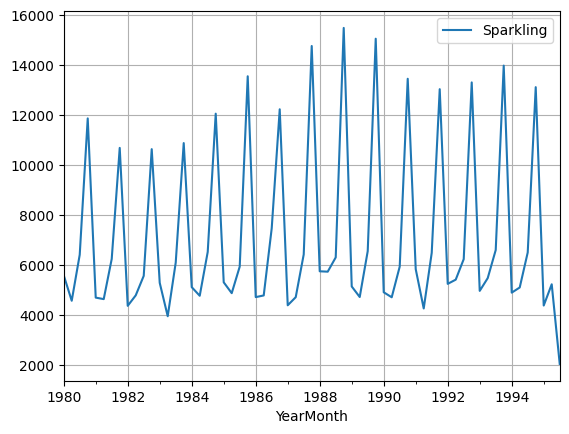

In [198]:
Sparkling_df_quarterly_sum.plot();
plt.grid()

In [199]:
Sparkling_df_quarterly_mean = Sparkling_df.resample('Q').mean()
Sparkling_df_quarterly_mean.head()

Sparkling
YearMonth              
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

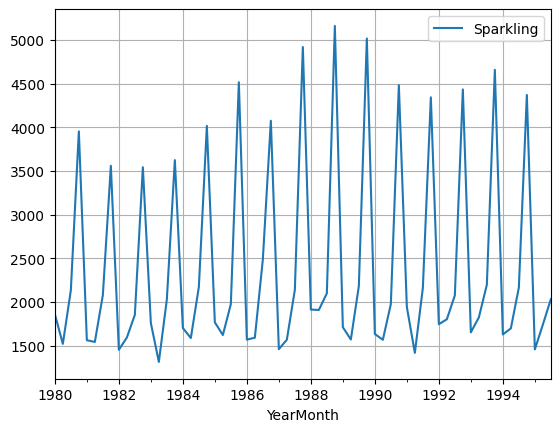

In [200]:
Sparkling_df_quarterly_mean.plot();
plt.grid()

In [201]:
from statsmodels.tsa.seasonal import seasonal_decompose

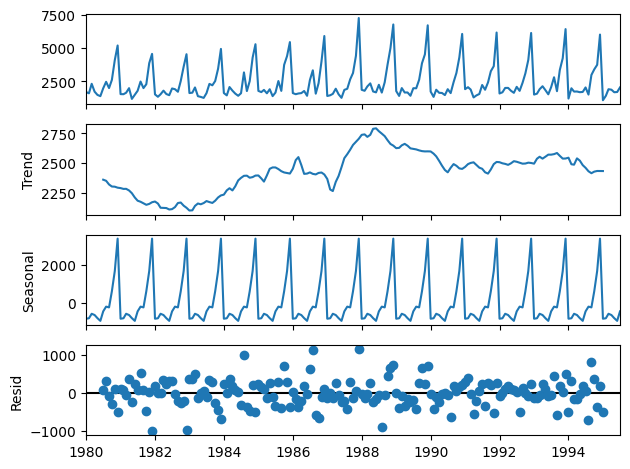

In [202]:
decomposition = seasonal_decompose(Sparkling_df,model='additive')
decomposition.plot();

In [203]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [204]:
print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2360.67
1980-08-01    2351.33
1980-09-01    2320.54
1980-10-01    2303.58
1980-11-01    2302.04
1980-12-01    2293.79
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.26
1980-02-01    -830.35
1980-03-01    -592.36
1980-04-01    -658.49
1980-05-01    -824.42
1980-06-01    -967.43
1980-07-01    -465.50
1980-08-01    -214.33
1980-09-01    -254.68
1980-10-01     599.77
1980-11-01    1675.07
1980-12-01    3386.98
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01     70.84
1980-08-01    316.00
1980-09-01    -81.86
1980-10-01   -307.35
1980-11-01    109.89
1980-12-01   -501.78
Name: resid, dtype: float64 



In [205]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.round(2).head(12)

YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2431.50
1980-08-01    2667.33
1980-09-01    2238.68
1980-10-01    1996.23
1980-11-01    2411.93
1980-12-01    1792.02
dtype: float64

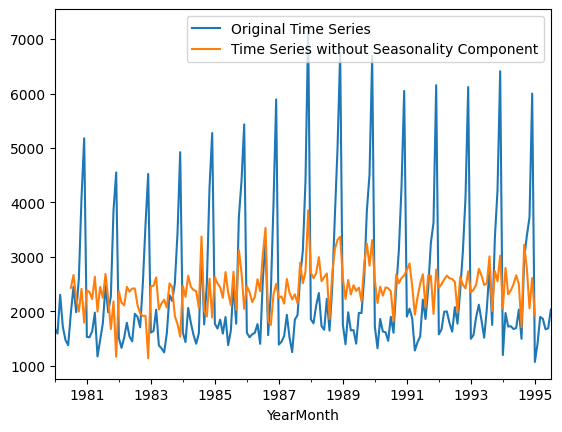

In [206]:
Sparkling_df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

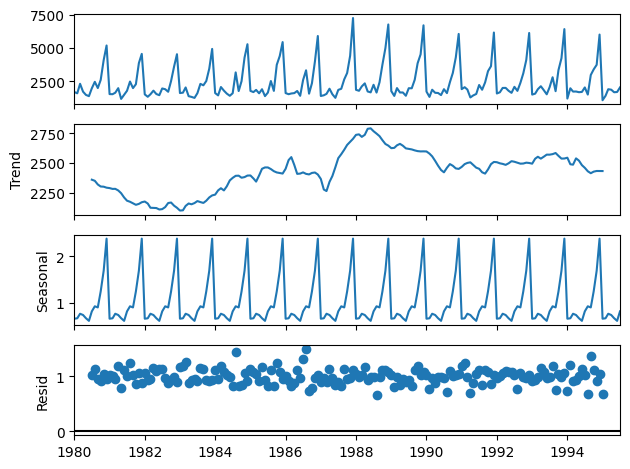

In [207]:
decomposition_mul = seasonal_decompose(Sparkling_df,model='multiplicative')
decomposition_mul.plot();

In [208]:
trend_mul = decomposition_mul.trend
seasonality_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

In [209]:
print('Trend','\n',trend_mul.round(2).head(12),'\n')
print('Seasonality','\n',seasonality_mul.round(2).head(12),'\n')
print('Residual','\n',residual_mul.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2360.67
1980-08-01    2351.33
1980-09-01    2320.54
1980-10-01    2303.58
1980-11-01    2302.04
1980-12-01    2293.79
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.65
1980-02-01    0.66
1980-03-01    0.76
1980-04-01    0.73
1980-05-01    0.66
1980-06-01    0.60
1980-07-01    0.81
1980-08-01    0.92
1980-09-01    0.89
1980-10-01    1.24
1980-11-01    1.69
1980-12-01    2.38
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01     NaN
1980-02-01     NaN
1980-03-01     NaN
1980-04-01     NaN
1980-05-01     NaN
1980-06-01     NaN
1980-07-01    1.03
1980-08-01    1.14
1980-09-01    0.96
1980-10-01    0.91
1980-11-01    1.05
1980-12-01    0.95
Name: resid, dtype: float64 



In [210]:
deaseasonalized_ts_mul = trend_mul + residual_mul
deaseasonalized_ts_mul.round(2).head(12)

YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2361.70
1980-08-01    2352.47
1980-09-01    2321.50
1980-10-01    2304.49
1980-11-01    2303.09
1980-12-01    2294.74
dtype: float64

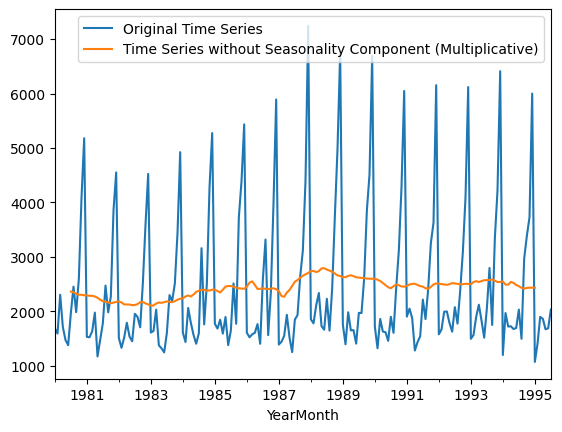

In [211]:
Sparkling_df.plot()
deaseasonalized_ts_mul.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component (Multiplicative)"]);

In [212]:
S_df = pd.read_csv("/content/drive/MyDrive/Time Series Forecasting/Sparkling.csv")

In [213]:
S_df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [214]:
S_df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [215]:
date = pd.date_range(start='1/1/1980', periods=len(S_df), freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [216]:
S_df['Time_Stamp'] = pd.DataFrame(date, columns=['YearMonth'])
S_df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [217]:
S_df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
S_df.drop(labels='YearMonth', axis=1, inplace=True)
S_df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [218]:
train = S_df[S_df.index<'1991']
test = S_df[S_df.index>='1991']

In [219]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [220]:
from IPython.display import display

In [221]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

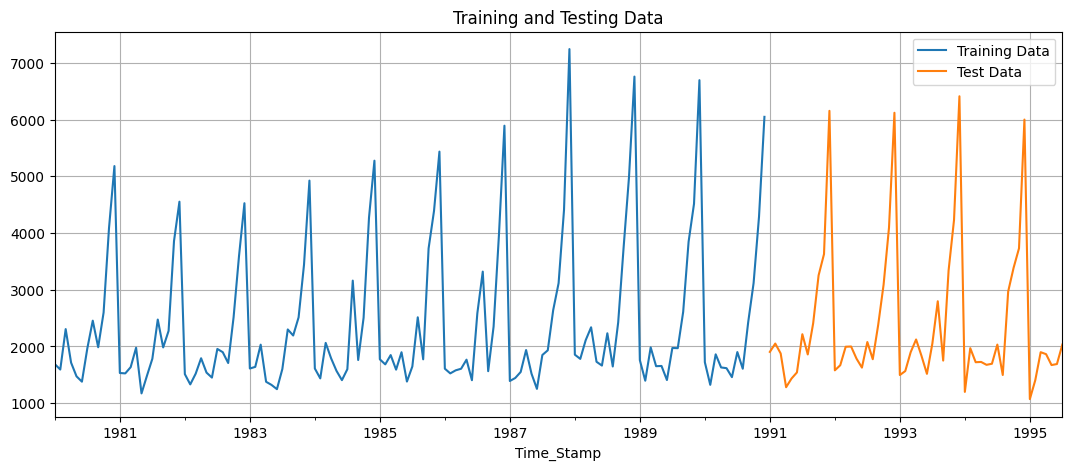

In [222]:
train['Sparkling'].plot(figsize=(13,5),fontsize=10)
test['Sparkling'].plot(figsize=(13,5),fontsize=10)
plt.grid()
plt.title("Training and Testing Data")
plt.legend(['Training Data','Test Data'])
plt.show()

In [223]:
range(len(train))

range(0, 132)

In [224]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [225]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [226]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

Last few rows of Training Data


Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132

First few rows of Test Data


Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137

Last few rows of Test Data


Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187

In [227]:
from sklearn.linear_model import LinearRegression

In [228]:
lr = LinearRegression()
lr.fit(LinearRegression_train[["time"]],LinearRegression_train["Sparkling"].values)

LinearRegression()

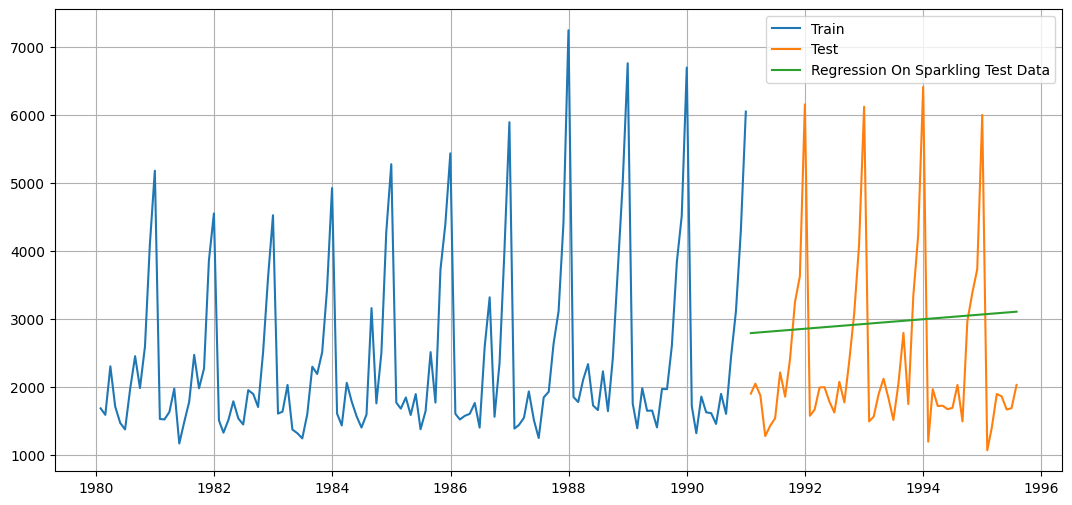

In [229]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Sparkling Test Data')
plt.legend(loc='best')
plt.grid();

In [230]:
from sklearn import metrics

In [231]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("RSME for lr_model1 is: ",rmse_model1_test)

RSME for lr_model1 is:  1389.135174897992


In [232]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

##Naive Approach

In [233]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [234]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

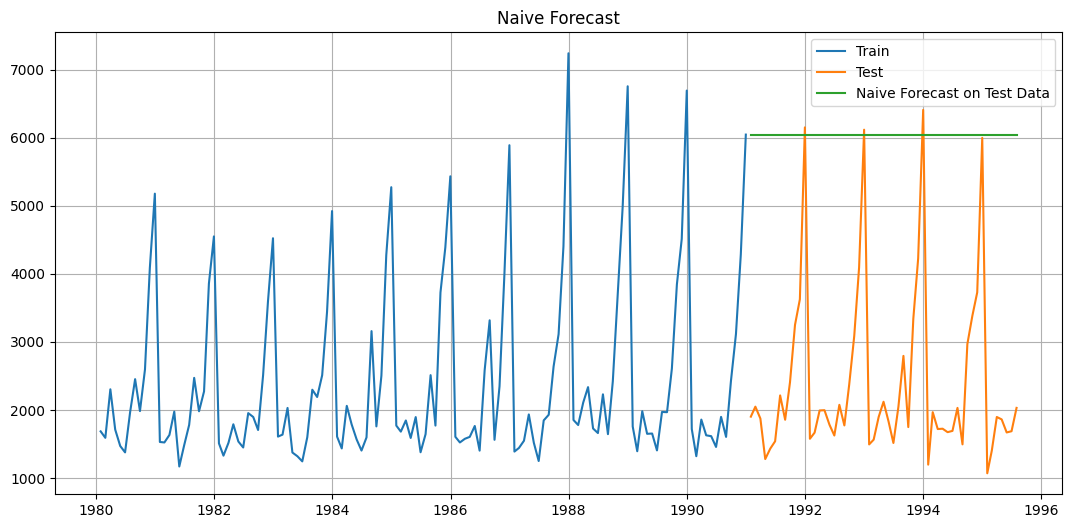

In [235]:
plt.figure(figsize=(13,6))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [236]:
rmse_model2_test=metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("RMSE for lr_model 2 is: " ,rmse_model2_test)

RMSE for lr_model 2 is:  3864.2793518443914


In [237]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

##Simple Average

In [238]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [239]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

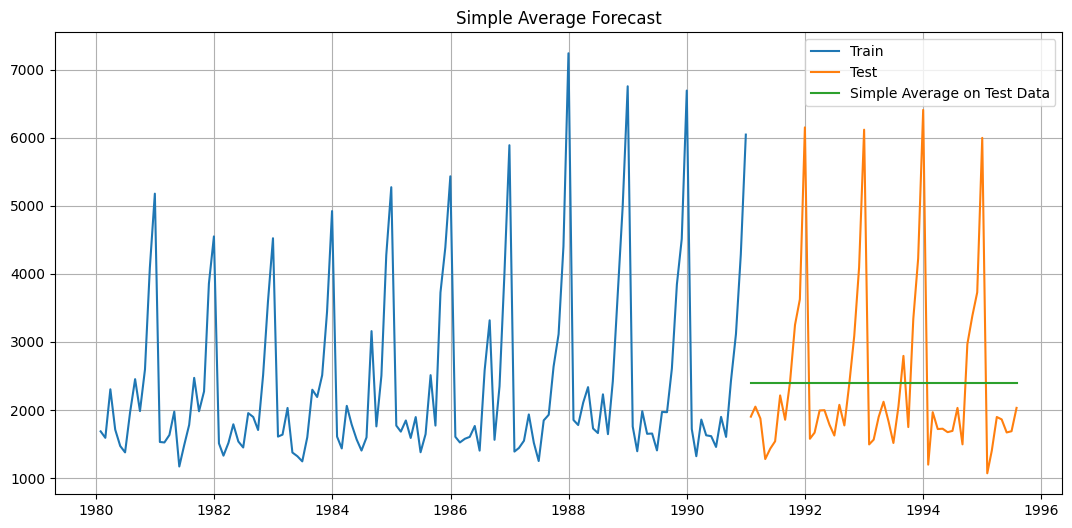

In [240]:
plt.figure(figsize=(13,6))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [241]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("RMSE for lr_model 3 is: " ,rmse_model3_test)

RMSE for lr_model 3 is:  1275.0818036965309


In [242]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

##Moving Average

In [243]:
MovingAverage = S_df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [244]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

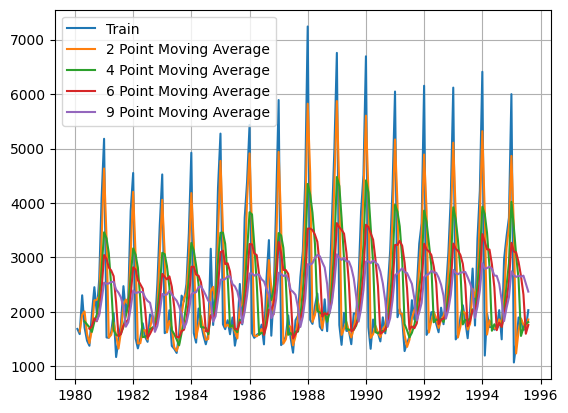

In [245]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [246]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

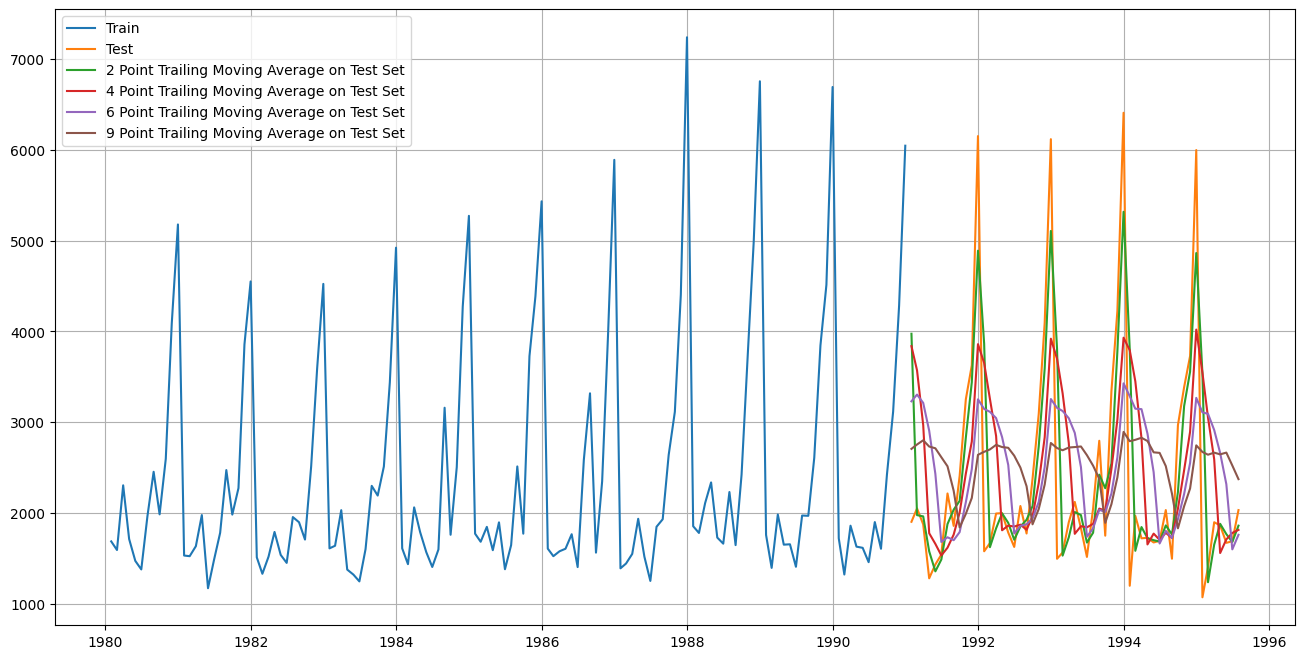

In [247]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [248]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [249]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

##Simple Exponential Smoothing

In [250]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [251]:
SES_train = train.copy()
SES_test = test.copy()

In [252]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [253]:
model_SES_autofit = model_SES.fit(optimized=True)

In [254]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [255]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2676.676366
1991-02-28       2049  2676.676366
1991-03-31       1874  2676.676366
1991-04-30       1279  2676.676366
1991-05-31       1432  2676.676366

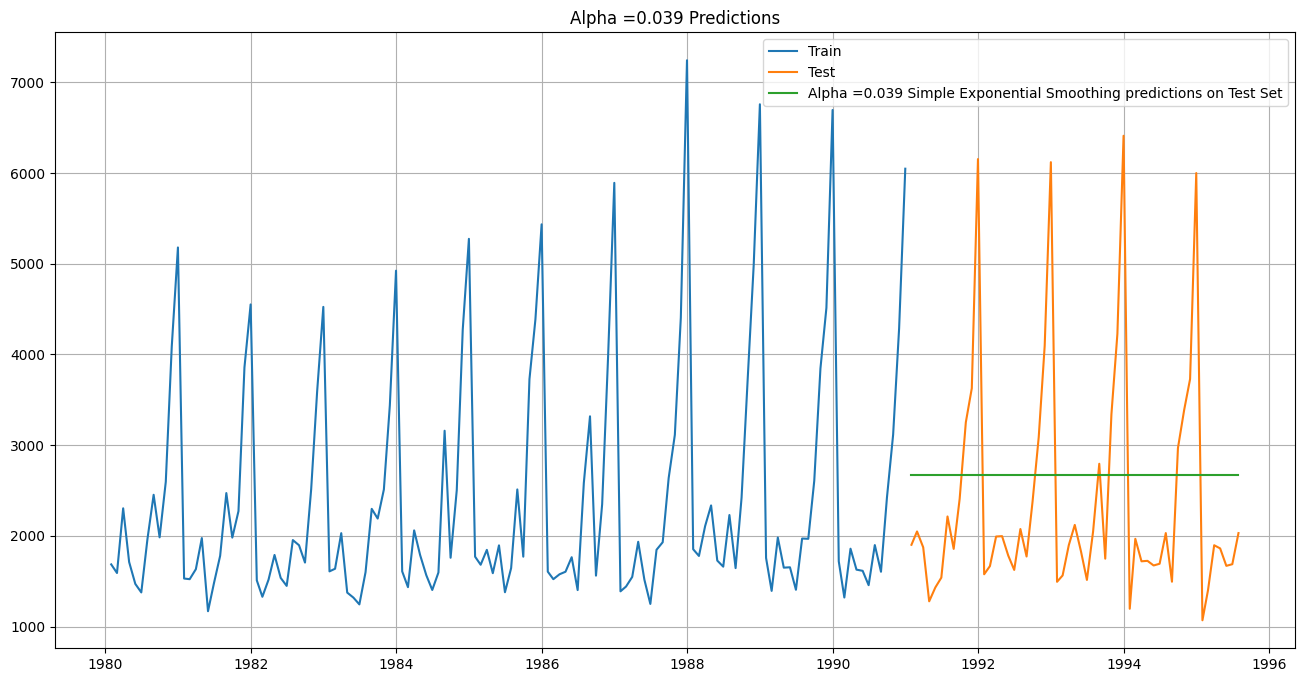

In [256]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.039 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.039 Predictions');

In [257]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.039 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.039 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [258]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.039,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        1389.135175
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.039,SimpleExponentialSmoothing  1304.927405

## Double Exponential Smoothing (Holt's Model)

In [259]:
DES_train=train.copy()
DES_test=test.copy()

In [260]:
len(test)

55

In [261]:
model_DES=Holt(DES_train["Sparkling"])

In [262]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [263]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)

        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)

        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)

        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [264]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

In [265]:
resultsDf_7.sort_values(by=['Test RMSE'])

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
10           0.2          0.1  1418.041591   3611.763322
2            0.1          0.3  1445.762015   4293.084674
20           0.3          0.1  1431.169601   5908.185554
..           ...          ...          ...           ...
98           1.0          0.9  1985.368445  57823.177011
79           0.8          1.0  1872.711054  57990.117908
89           0.9          1.0  1948.020916  59008.254331
99           1.0          1.0  2077.672157  59877.076519
19           0.2          1.0  2325.013004  60749.773505

[100 rows x 4 columns]

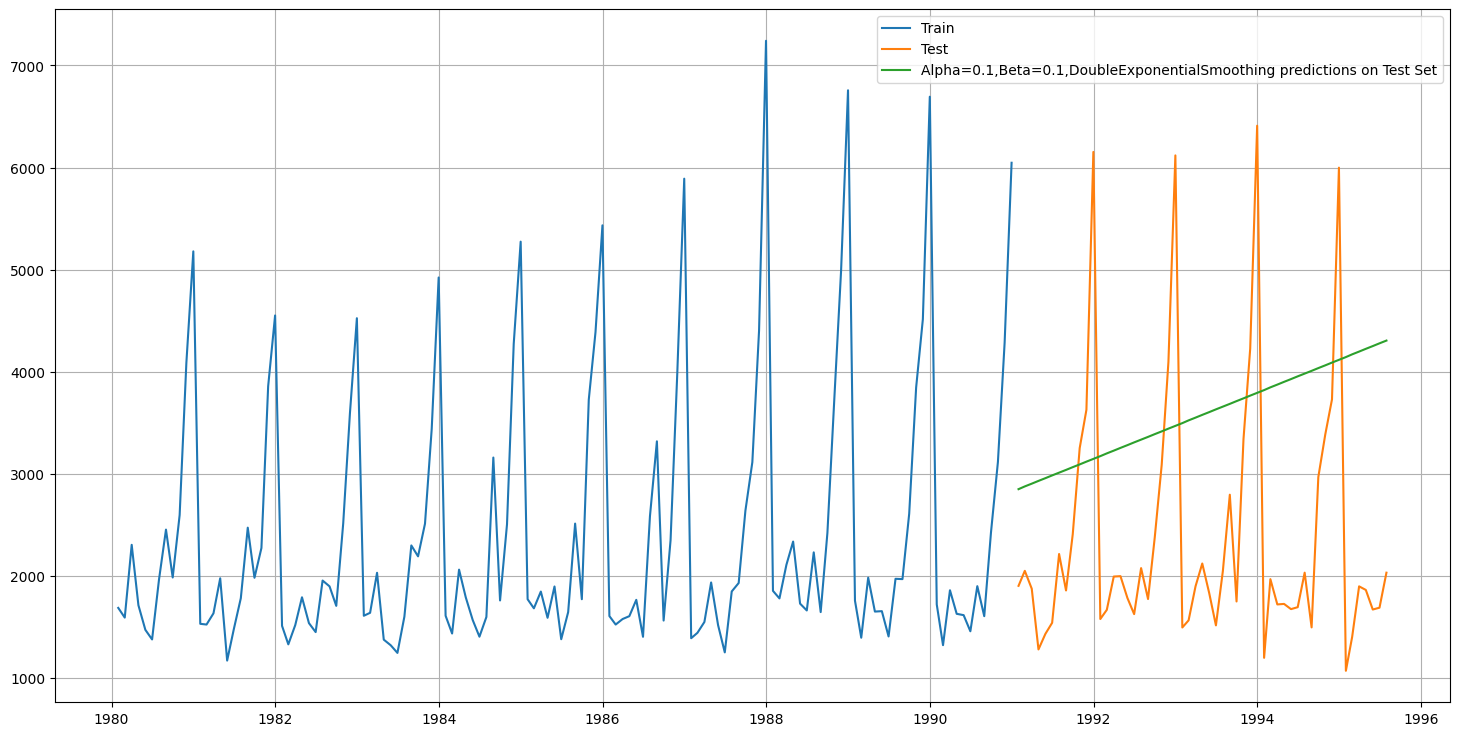

In [266]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.show();

In [267]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     813.400684
4pointTrailingMovingAverage                    1156.589694
6pointTrailingMovingAverage                    1283.927428
9pointTrailingMovingAverage                    1346.278315
Alpha=0.039,SimpleExponentialSmoothing         1304.927405
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.564670

##Triple Exponential Smoothing (Holt - Winter's Model)

In [268]:
TES_train = train.copy()
TES_test = test.copy()

In [269]:
TES_train.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [270]:
TES_train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [271]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [272]:
model_TES_autofit = model_TES.fit()

In [273]:
model_TES_autofit.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [274]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1587.685845
1991-02-28       2049   1356.590237
1991-03-31       1874   1763.121866
1991-04-30       1279   1656.379813
1991-05-31       1432   1542.186697

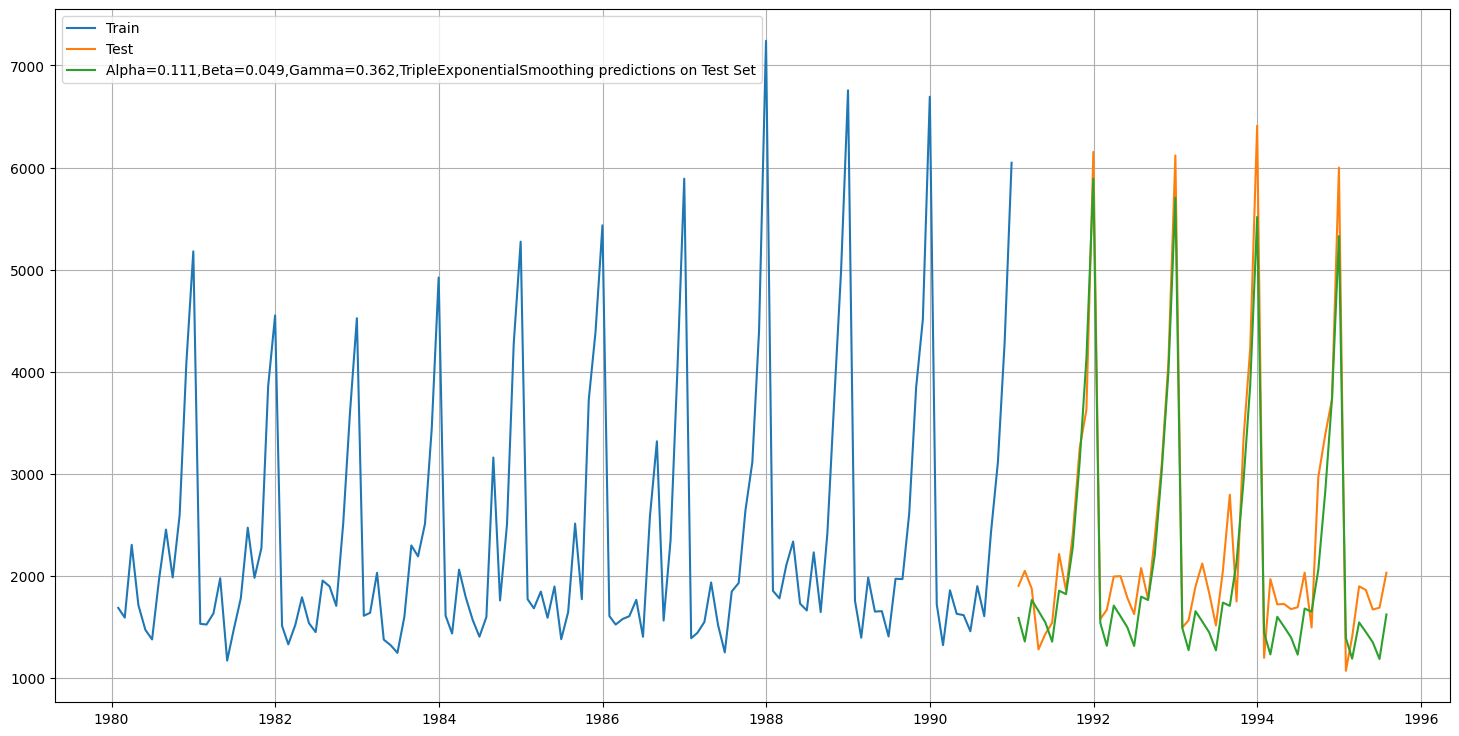

In [275]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [276]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 403.706


In [277]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228

In [278]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [279]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)

            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)

            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)

            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.1          0.1           0.1  3.814397e+02  5.910387e+02
1             0.1          0.1           0.2  3.677929e+02  6.214407e+02
2             0.1          0.1           0.3  3.614334e+02  6.395595e+02
3             0.1          0.1           0.4  3.607002e+02  6.447910e+02
4             0.1          0.1           0.5  3.644451e+02  6.410980e+02
..            ...          ...           ...           ...           ...
995           1.0          1.0           0.6  1.882994e+05  4.386054e+06
996           1.0          1.0           0.7  2.660015e+05  8.649577e+06
997           1.0          1.0           0.8  1.101923e+06  2.700435e+05
998           1.0          1.0           0.9  7.695708e+04  2.472201e+05
999           1.0          1.0           1.0  2.456050e+04  1.256914e+05

[1000 rows x 5 columns]

In [280]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
301           0.4          0.1           0.2  384.467709  317.434302
211           0.3          0.2           0.2  388.544148  329.037543
200           0.3          0.1           0.1  388.220071  337.080969
110           0.2          0.2           0.1  398.482510  340.186457
402           0.5          0.1           0.3  396.598057  345.913415

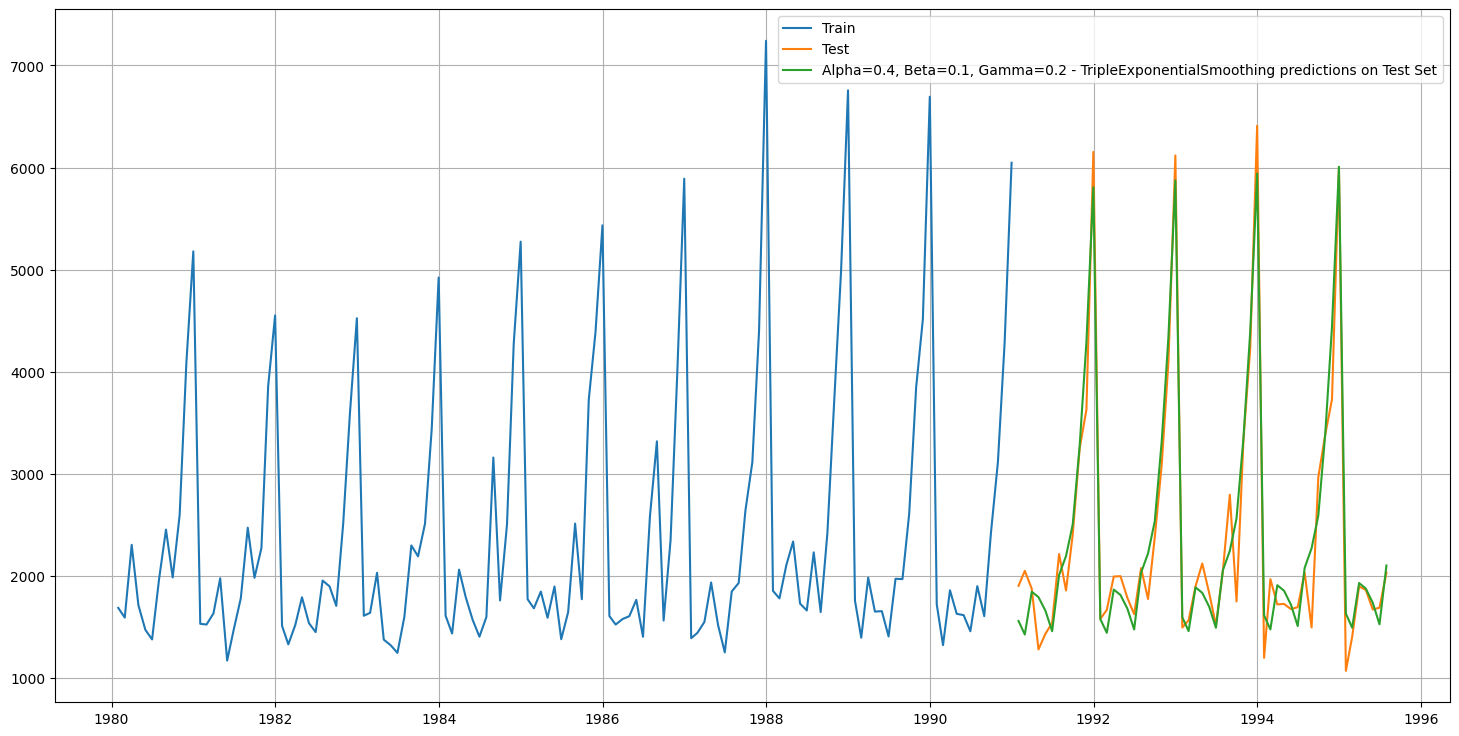

In [281]:
plt.figure(figsize=(18, 9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['predict',0.4,0.1,0.2], label='Alpha=0.4, Beta=0.1, Gamma=0.2 - TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.show();

In [282]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302

In [283]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
6pointTrailingMovingAverage                         1283.927428
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
9pointTrailingMovingAverage                         1346.278315
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

## Test for stationarity of the series - Dicky Fuller test

In [284]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

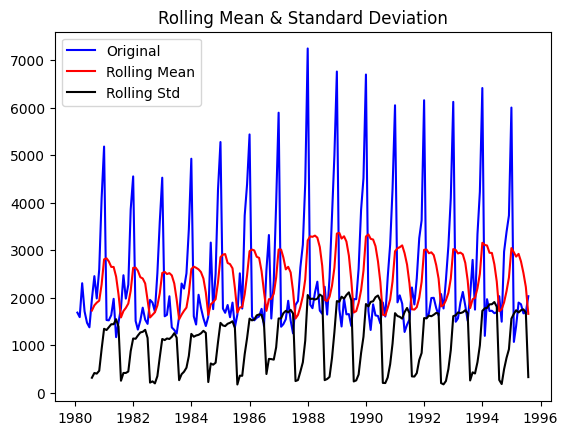

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [285]:
test_stationarity(S_df['Sparkling'])

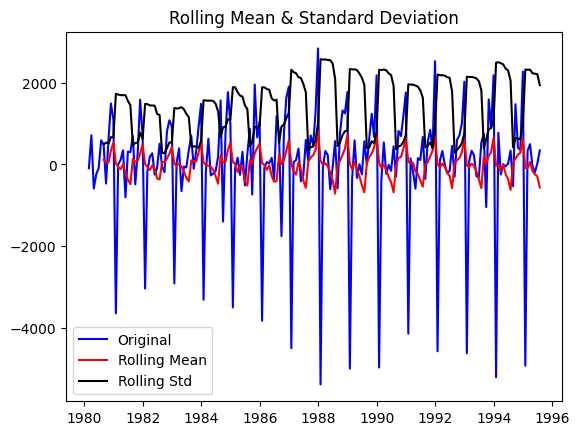

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



<Figure size 2000x800 with 0 Axes>

In [286]:
test_stationarity(S_df['Sparkling'].diff().dropna())
plt.figure(figsize=(20, 8))
plt.show()

In [287]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

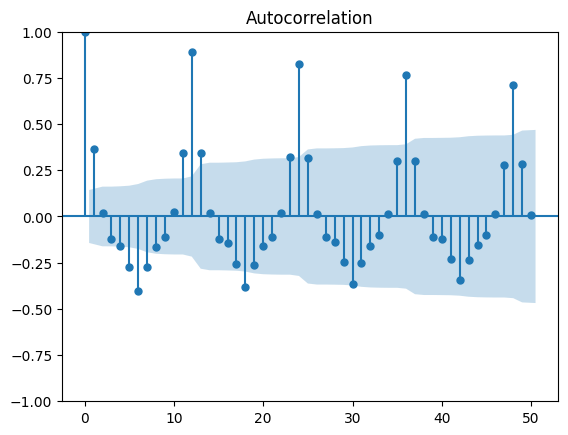

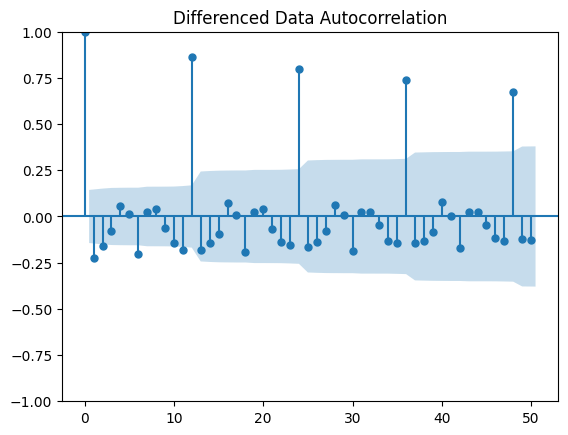

In [288]:
plot_acf(S_df['Sparkling'],lags=50)
plot_acf(S_df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

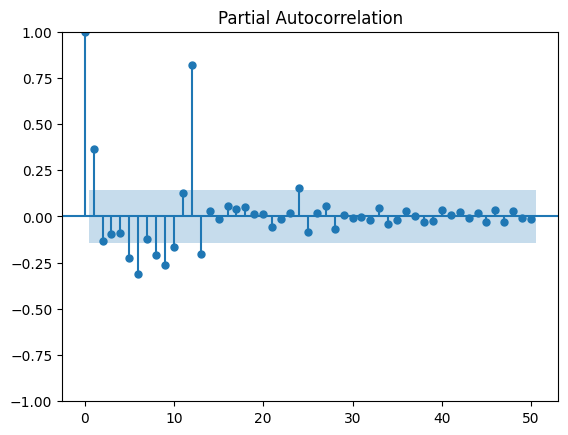

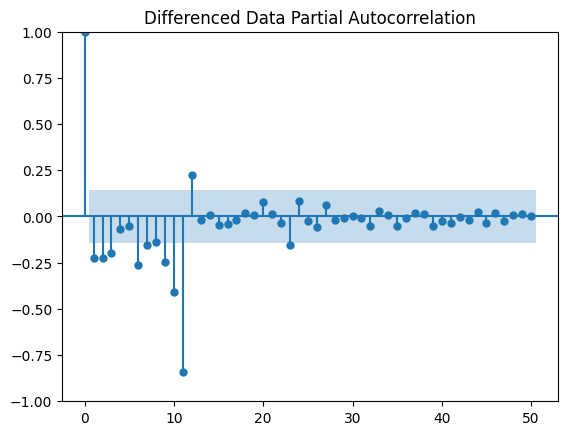

In [289]:
plot_pacf(S_df['Sparkling'],lags=50)
plot_pacf(S_df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

##Check for stationarity of the Training Data Time Series

In [290]:
train_stat=train.copy()
test_stat=test.copy()

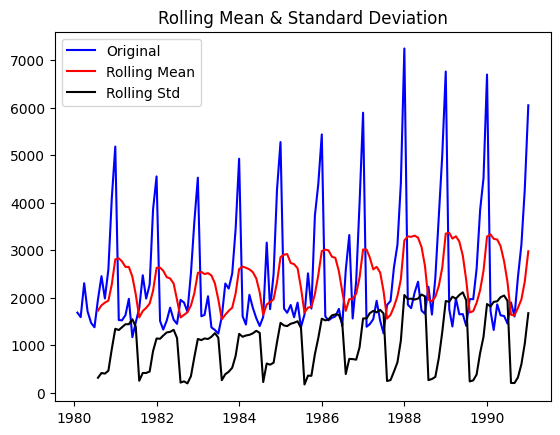

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [291]:
test_stationarity(train_stat['Sparkling'])

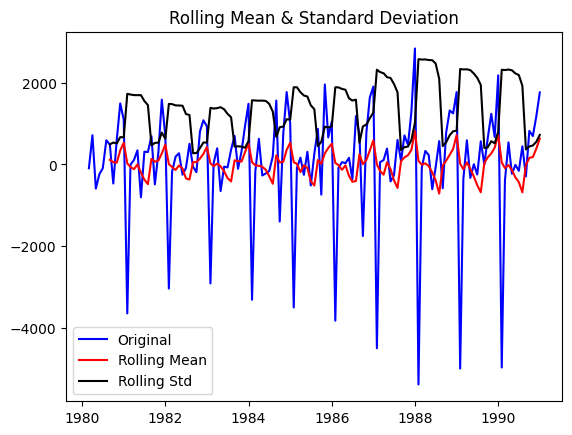

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [292]:
test_stationarity(train_stat['Sparkling'].diff().dropna())

In [293]:
train_stat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [294]:
import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [295]:
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [296]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train_stat['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:2271.2058190597454
ARIMA(0, 0, 1) - AIC:2245.3121356629863
ARIMA(0, 0, 2) - AIC:2245.347184332699
ARIMA(1, 0, 0) - AIC:2247.358828724367
ARIMA(1, 0, 1) - AIC:2246.005399728345
ARIMA(1, 0, 2) - AIC:2246.9357004523144
ARIMA(2, 0, 0) - AIC:2244.811781900305
ARIMA(2, 0, 1) - AIC:2236.5908601649503
ARIMA(2, 0, 2) - AIC:2248.2772806941866


In [297]:
ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
7  (2, 0, 1)  2236.590860
6  (2, 0, 0)  2244.811782
1  (0, 0, 1)  2245.312136
2  (0, 0, 2)  2245.347184
4  (1, 0, 1)  2246.005400
5  (1, 0, 2)  2246.935700
3  (1, 0, 0)  2247.358829
8  (2, 0, 2)  2248.277281
0  (0, 0, 0)  2271.205819

In [298]:
auto_ARIMA = ARIMA(train_stat['Sparkling'], order=(2,0,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1113.295
Date:                Sun, 10 Sep 2023   AIC                           2236.591
Time:                        14:00:19   BIC                           2251.005
Sample:                    01-31-1980   HQIC                          2242.448
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2399.4586    118.215     20.297      0.000    2167.762    2631.155
ar.L1          1.2375      0.138      8.938      0.000       0.966       1.509
ar.L2         -0.5293      0.124     -4.266      0.0

In [299]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_stat))

In [300]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_stat['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1269.3456584301343


In [301]:
resultsDf1a = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,0,1)'])

resultsDf1a


Test RMSE
ARIMA(2,0,1)  1269.345658

In [302]:
resultsDf = pd.concat([resultsDf, resultsDf1a])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
ARIMA(2,0,1)                                        1269.345658

In [303]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [304]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [305]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_stat['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.4083231352784
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.755094674255
ARIMA(1, 1, 2) - AIC:2234.5272004518056
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626238336
ARIMA(2, 1, 2) - AIC:2213.5092125741553


In [306]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [307]:
auto_ARIMA = ARIMA(train_stat['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 10 Sep 2023   AIC                           2213.509
Time:                        14:00:21   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

In [308]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_stat))

In [309]:
rmse = mean_squared_error(test_stat['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.9797494286825


In [310]:
resultsDf1b = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf1b

Test RMSE
ARIMA(2,1,2)  1299.979749

In [311]:
resultsDf = pd.concat([resultsDf, resultsDf1b])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
ARIMA(2,0,1)                                        1269.345658
ARIMA(2,1,2)                                        1299.979749

<Figure size 1800x800 with 0 Axes>

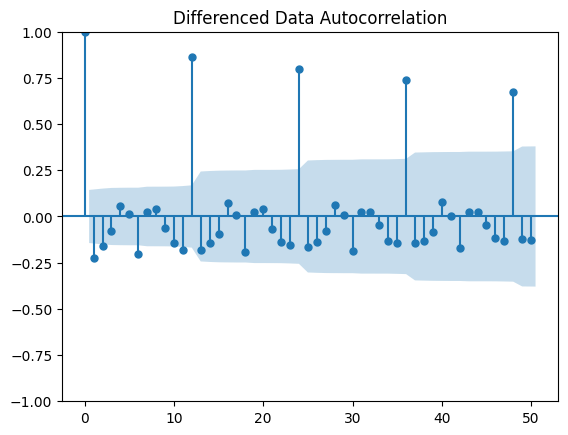

In [312]:
plt.figure(figsize=(18, 8))
plot_acf(S_df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [313]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [314]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [315]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_stat['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716284
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890958
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844432804
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360110923017
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510464
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657741
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082816
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339544012
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878467
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298134953
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093283015115
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510382709
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.771793356
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6964523369002
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2

In [316]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.678698
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888809
17  (0, 1, 1)  (2, 0, 2, 6)  1741.696452
44  (1, 1, 1)  (2, 0, 2, 6)  1743.374728
71  (2, 1, 1)  (2, 0, 2, 6)  1744.040769

In [317]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_stat['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sun, 10 Sep 2023   AIC                           1727.679
Time:                                   14:01:08   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.256      0.024      -1.205      -0.085
ma.L1         -0.1069      0.250     -0.428

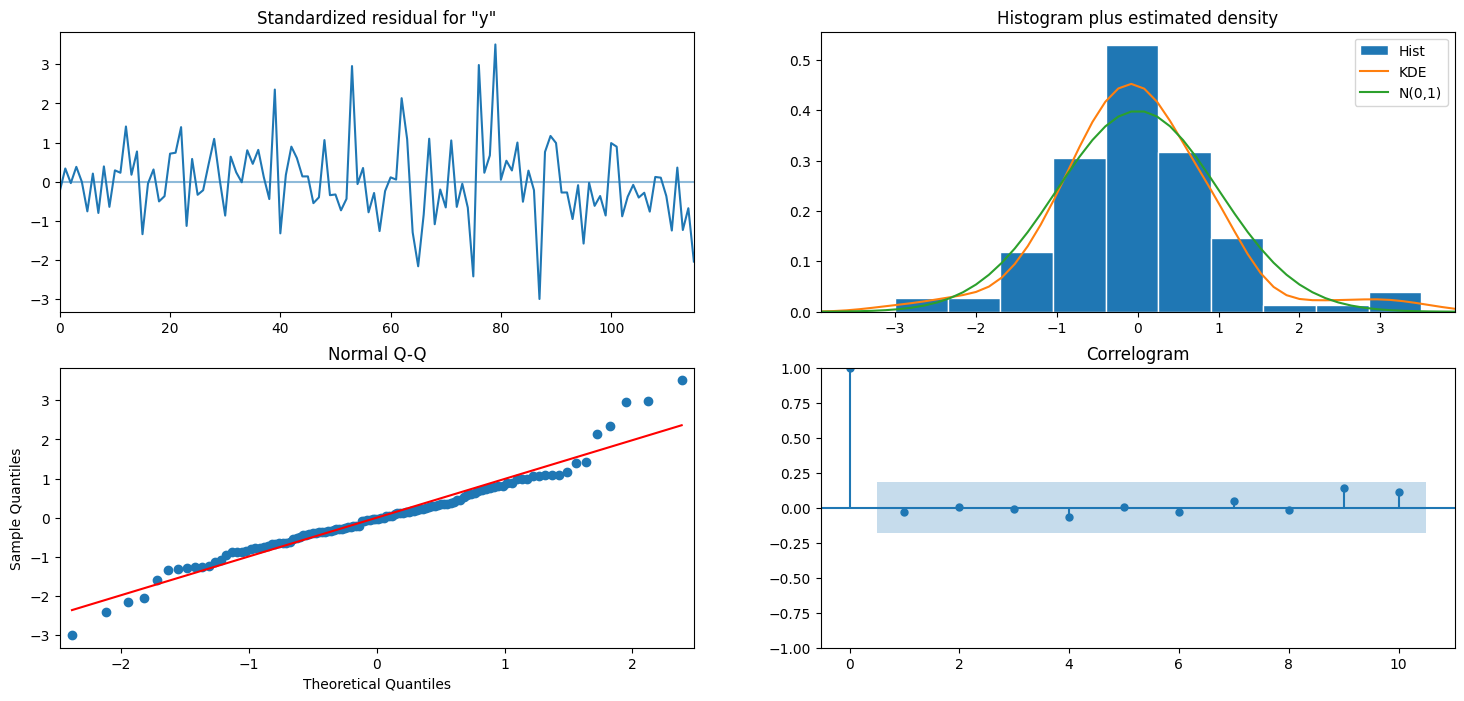

In [318]:
results_auto_SARIMA_6.plot_diagnostics(figsize=(18,8))
plt.show()

In [319]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_stat))

In [320]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.393189  380.564773     584.499940    2076.286437
1  1177.260495  392.117175     408.724954    1945.796037
2  1625.929590  392.311510     857.013160    2394.846019
3  1546.281100  397.711790     766.780315    2325.781885
4  1308.737968  398.931580     526.846440    2090.629497

In [321]:
rmse = mean_squared_error(test_stat['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.9452200743772


In [322]:
resultsDf2 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 2)(2, 0, 2, 6)'])

resultsDf2

Test RMSE
SARIMA(1, 1, 2)(2, 0, 2, 6)  626.94522

In [323]:
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
ARIMA(2,0,1)                                        1269.345658
ARIMA(2,1,2)                                        1299.979749
SARIMA(1, 1, 2)(2, 0, 2, 6)                          626.945220

In [324]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
SARIMA(1, 1, 2)(2, 0, 2, 6)                          626.945220
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
ARIMA(2,0,1)                                        1269.345658
SimpleAverageModel                                  1275.081804
6pointTrailingMovingAverage                         1283.927428
ARIMA(2,1,2)                                        1299.979749
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
9pointTrailingMovingAverage                         1346.278315
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

In [325]:
fullmodel1 = ExponentialSmoothing(S_df,
                                  trend='add', seasonal='add', seasonal_periods=12)
fitted_model = fullmodel1.fit(smoothing_level=0.4, smoothing_slope=0.1, smoothing_seasonal=0.2)
print(fitted_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Sparkling   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       32101160.793
Optimized:                         True   AIC                           2285.966
Trend:                         Additive   BIC                           2337.664
Seasonal:                      Additive   AICC                          2290.037
Seasonal Periods:                    12   Date:                 Sun, 10 Sep 2023
Box-Cox:                          False   Time:                         14:01:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4000000                alpha                False
smoothing_trend          

In [326]:
RMSE_fullmodel1 = np.sqrt(mean_squared_error(S_df['Sparkling'], fitted_model.fittedvalues))
print('RMSE:', RMSE_fullmodel1)

RMSE: 414.32349855829955


In [327]:
forecast = fitted_model.forecast(steps=12)

In [328]:
print("Forecasted values for the next 12 months:")
print(forecast)

Forecasted values for the next 12 months:
1995-08-31    2109.045832
1995-09-30    2559.797350
1995-10-31    3422.287746
1995-11-30    4250.906272
1995-12-31    6356.628723
1996-01-31    1599.870659
1996-02-29    1823.859678
1996-03-31    2031.522463
1996-04-30    1974.769157
1996-05-31    1827.184573
1996-06-30    1734.006027
1996-07-31    2206.754277
Freq: M, dtype: float64


In [329]:
forecast_df = pd.DataFrame({'ForecastedValues': forecast})
forecast_summary = forecast_df.describe(percentiles=[0.05, 0.95])

print("Summary of Forecasted Values:")
print(forecast_summary)

Summary of Forecasted Values:
       ForecastedValues
count         12.000000
mean        2658.052730
std         1399.177781
min         1599.870659
5%          1673.645111
50%         2070.284147
95%         5198.481375
max         6356.628723


In [330]:
pred_1_df = pd.DataFrame({'lower_CI':forecast - 1.96*np.std(fitted_model.resid,ddof=1),
                        'prediction':forecast,
                        'upper_ci': forecast + 1.96*np.std(fitted_model.resid,ddof=1)})

In [331]:
pred_1_df

lower_CI   prediction     upper_ci
1995-08-31  1294.848664  2109.045832  2923.243000
1995-09-30  1745.600182  2559.797350  3373.994518
1995-10-31  2608.090578  3422.287746  4236.484914
1995-11-30  3436.709104  4250.906272  5065.103440
1995-12-31  5542.431556  6356.628723  7170.825891
1996-01-31   785.673491  1599.870659  2414.067827
1996-02-29  1009.662511  1823.859678  2638.056846
1996-03-31  1217.325295  2031.522463  2845.719630
1996-04-30  1160.571989  1974.769157  2788.966325
1996-05-31  1012.987405  1827.184573  2641.381741
1996-06-30   919.808859  1734.006027  2548.203195
1996-07-31  1392.557109  2206.754277  3020.951445

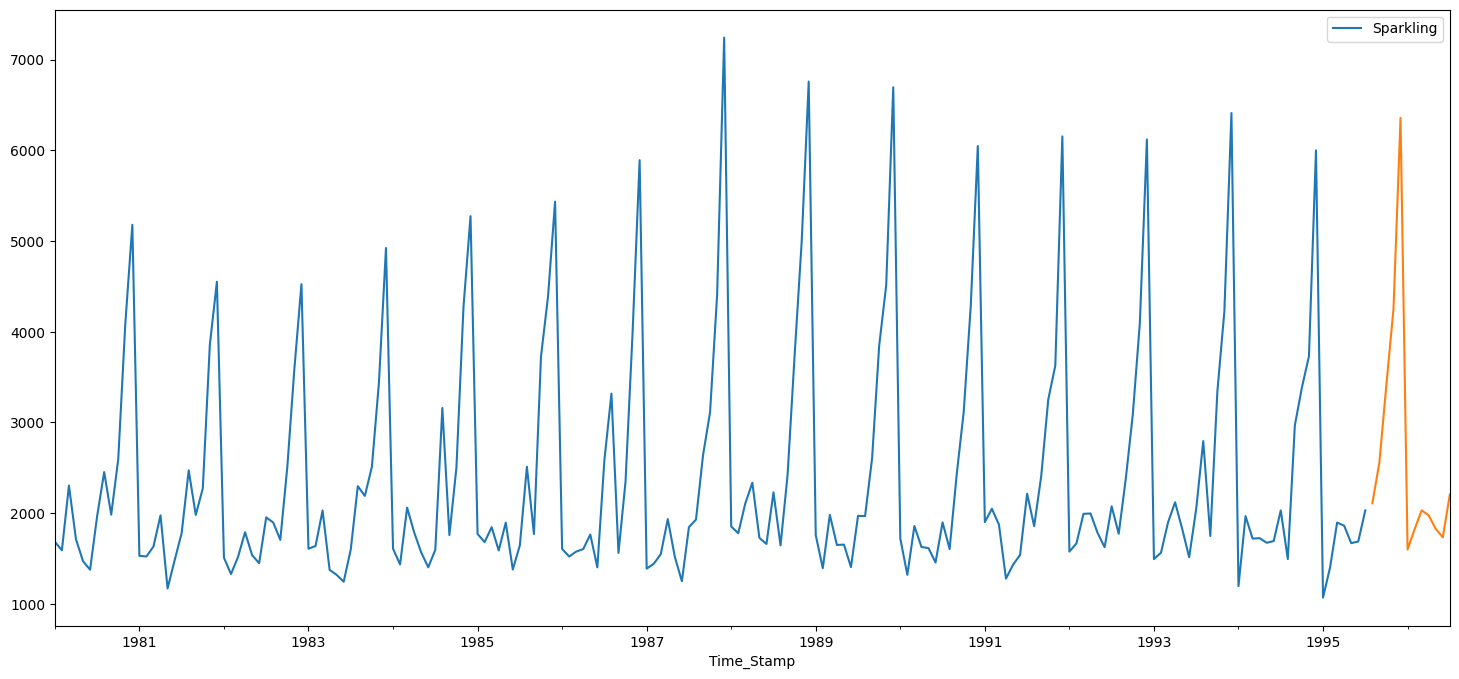

In [332]:
S_df.plot(figsize=(18,8))
forecast.plot();

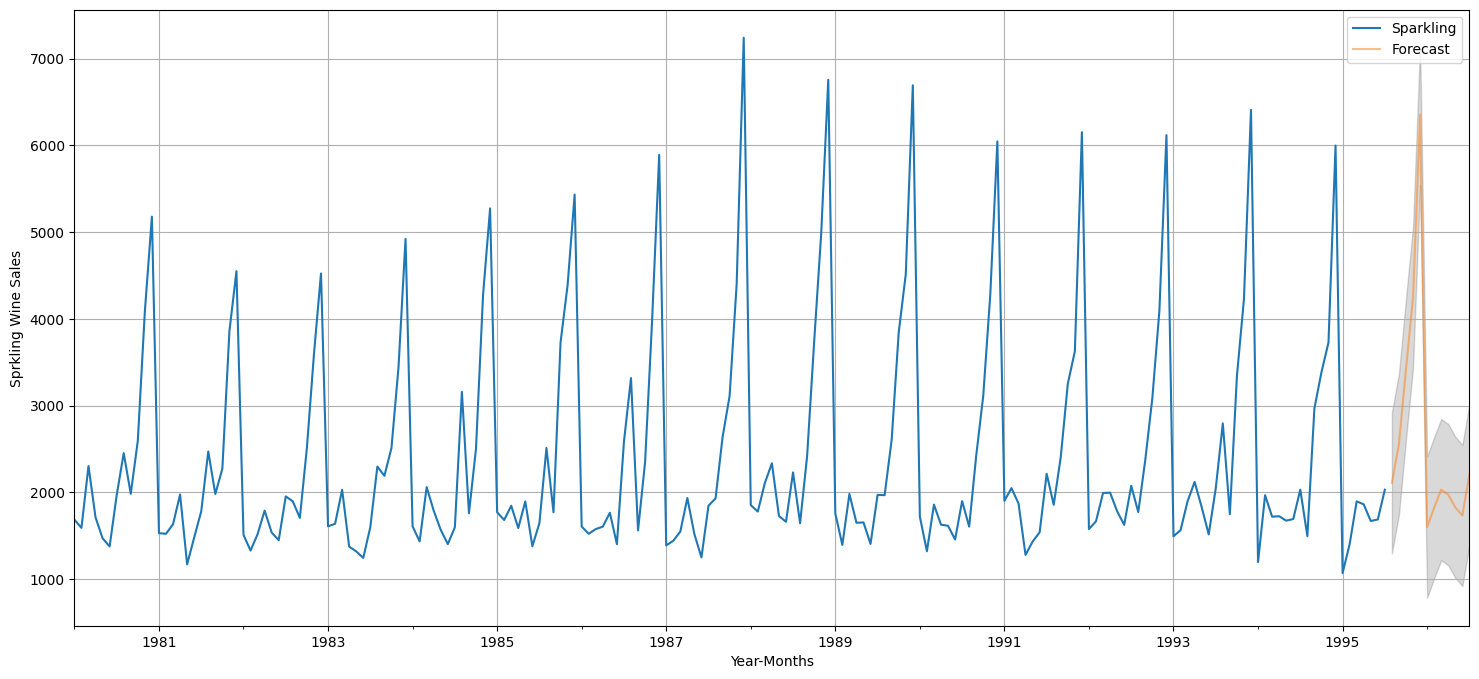

In [333]:
axis=S_df.plot(label='Actual', figsize=(18,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5), axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'],pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sprkling Wine Sales')
plt.legend(loc='best')
plt.grid()
plt.show()